In [1]:
# load libraris 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

import warnings
warnings.filterwarnings(action='ignore')    

# plot
import seaborn as sns
    
# Split    
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import *

# model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_validate

#Regression statsmodel
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# time
import time

# itertools
import itertools

import scipy

from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_validate

# load Data

In [2]:
data=pd.read_csv('../data/onion_columns_all_merge_final.csv')
df=data.iloc[:,3:]
df.head()

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


### 앞부분 ElasticNet 분석에서 변수 추출한 결과물 loading  후 column만 따로 추출하여 Modeling 돌린다.

In [3]:
elastic=pd.read_csv('../data/elastic_data.csv')
elastic.head()

,year_local,area,year,10a당 생산량 (kg),3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,2010_부산광역시,부산광역시,2010,7163,0.4,0.021,0.466667,0.006333,40.709677,0.466667,0.4,6.025806,4.451613,0.024,11.545161,2.709677,10.010714,36.433500
1,2011_부산광역시,부산광역시,2011,7393,0.4,0.019,0.500000,0.007000,33.645161,0.500000,0.4,5.483871,6.903226,0.024,12.522581,5.322581,10.860714,40.263000
2,2012_부산광역시,부산광역시,2012,6303,0.4,0.021,0.400000,0.006000,41.774194,0.400000,0.4,1.164516,3.903226,0.022,12.319355,5.677419,7.196552,37.487552
3,2013_부산광역시,부산광역시,2013,8265,0.5,0.023,0.500000,0.006000,41.709677,0.500000,0.4,6.483871,7.064516,0.025,14.683871,7.225806,9.278571,39.935000
4,2014_부산광역시,부산광역시,2014,7271,0.4,0.018,0.400000,0.007000,41.419355,0.400000,0.4,4.706452,9.258065,0.027,14.509677,7.096774,9.921429,41.049500


In [4]:
elastic=elastic.iloc[:,3:]
col=elastic.columns
col

Index(['10a당 생산량 (kg)', '3월 일산화탄소', '10월 이산화질소', '11월 일산화탄소', '12월 아황산가스',
       '습도 1월', '12월 일산화탄소', '4월 일산화탄소', '강수량 5월', '일조시간 8월', '2월 오존',
       '최고기온 3월', '일조시간 7월', '최고기온 2월', '아연 Zn'],
      dtype='object')

# MinMaxScaling

In [5]:
def scaling(df):
    scaler=MinMaxScaler()
    df_sc=scaler.fit_transform(df)
    return df_sc

In [6]:
df_mms=pd.DataFrame(scaling(df),
                       columns=df.columns)
df_mms

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.688295,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.720809,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.566723,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.844077,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.703562,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.696353,0.239880,0.264277,0.313380,0.420595,0.633301,0.756689,0.908217,0.805144,0.667943,...,0.090909,0.183612,0.000000,0.089733,0.000000,0.077627,0.059141,0.030998,0.107490,0.021430
140,0.601923,0.051562,0.000000,0.257870,0.407750,0.678462,0.714288,0.929831,0.776053,0.625937,...,0.090909,0.098078,0.200847,0.109603,0.000000,0.088634,0.071790,0.542459,0.265846,0.035717
141,0.588634,0.000000,0.004001,0.054587,0.357609,0.730405,0.839765,0.841975,0.765251,0.612378,...,0.181818,0.093517,0.254500,0.051726,0.173882,0.055903,0.026778,0.000000,0.265846,0.030359
142,0.657478,0.678800,0.896036,0.947921,1.000000,0.895536,1.000000,0.998555,0.919634,0.872913,...,0.090909,0.093517,0.299475,0.000000,0.079787,0.000000,0.044191,0.294478,0.164192,0.000000


# X, y 나누기

In [7]:
X = df_mms[col[1:]]
X.head(3)

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,0.25,0.464286,0.238095,0.619048,0.173620,0.208333,0.333333,0.888454,0.251440,0.344828,0.487138,0.033808,0.862842,0.029470
1,0.25,0.392857,0.285714,0.714286,0.000000,0.250000,0.333333,0.803040,0.616123,0.344828,0.585803,0.417443,0.953267,0.114290
2,0.25,0.464286,0.142857,0.571429,0.199782,0.125000,0.333333,0.122274,0.169866,0.275862,0.565288,0.469542,0.563463,0.052816


In [8]:
y = df_mms[col[0]]
y

0      0.688295
1      0.720809
2      0.566723
3      0.844077
4      0.703562
         ...   
139    0.696353
140    0.601923
141    0.588634
142    0.657478
143    0.788945
Name: 10a당 생산량 (kg), Length: 144, dtype: float64

# Feature Reduction - Stepwise

## 전진선택법(step=1)

In [9]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].idxmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

## 후진선택법(step=1)

In [10]:
def backward(X,y,predictors):
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].idxmin()]
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

## Subset

In [11]:
def processSubset(X,y, feature_set):
            X = sm.add_constant(X)
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}

## 단계선택법

In [12]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    return (Stepmodels['model'][len(Stepmodels['model'])])

# Running Stepwise

In [13]:
Stepwise_best_model=Stepwise_model(X,y)

Processed  14 models on 1 predictors in
Selected predictors: ['최고기온 2월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018AC972CF88>
forward
Processed  1 models on 0 predictors in
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018AC8F5F848>
Processed  13 models on 2 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018AC973E4C8>
forward
Processed  2 models on 1 predictors in
Selected predictors: ['최고기온 2월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018AC973AA88>
Processed  12 models on 3 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', '2월 오존', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018AC97420C8>
forward
Processed  3 models on 2 predictors in
Selected predictors: ['

# Result Summary 

In [14]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     22.34
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           6.53e-20
Time:                        12:25:17   Log-Likelihood:                 90.805
No. Observations:                 144   AIC:                            -165.6
Df Residuals:                     136   BIC:                            -141.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
최고기온 2월        0.1456      0.070      2.080      0.039       0.007       0.284
아연 Zn          0.2226      0.046      4.834      0.000       0.132       0.314
일조시간 7월        0.1577      0.057      2.785      0.006       0.046       0.270
강수량 5월         0.1134      0.046      2.470      0.015       0.023       0.204
10월 이산화질소     -0.2072      0.063     -3.270      0.001      -0.333      -0.082
11월 일산화탄소     -0.2050      0.077     -2.647      0.009      -0.358      -0.052
습도 1월         -0.0595      0.054     -1.106      0.271      -0.166       0.047
const          0.4511      0.077      5.866      0.000       0.299       0.603
==============================================================================
Omnibus:                        4.095   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                4.417
Skew:                           0.179   Prob(JB):                        0.110
Kurtosis:                       3.780   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Selected Variables from the result

In [15]:
result = pd.DataFrame( {'coefficients': Stepwise_best_model.params, 
                        'pvalue': Stepwise_best_model.pvalues})
result

,coefficients,pvalue
최고기온 2월,0.145596,3.935953e-02
아연 Zn,0.222640,3.558113e-06
일조시간 7월,0.157717,6.118617e-03
강수량 5월,0.113402,1.474845e-02
10월 이산화질소,-0.207236,1.363192e-03
11월 일산화탄소,-0.205025,9.068625e-03
습도 1월,-0.059480,2.708694e-01
const,0.451084,3.232146e-08


# Select only coefficients with pvalue less than 0.05

In [16]:
variable_list = result[result.pvalue < 0.05].index.values.tolist()
variable_list

['최고기온 2월', '아연 Zn', '일조시간 7월', '강수량 5월', '10월 이산화질소', '11월 일산화탄소', 'const']

# 단계적 선택법을 통해 추출된 변수만 적용된 데이터셋 준비  

In [17]:
sw_selected= pd.concat([df[variable_list[:-1]], df['10a당 생산량 (kg)']],
                       axis=1)
sw_selected

,최고기온 2월,아연 Zn,일조시간 7월,강수량 5월,10월 이산화질소,11월 일산화탄소,10a당 생산량 (kg)
0,10.010714,36.433500,2.709677,6.025806,0.021,0.466667,7163
1,10.860714,40.263000,5.322581,5.483871,0.019,0.500000,7393
2,7.196552,37.487552,5.677419,1.164516,0.021,0.400000,6303
3,9.278571,39.935000,7.225806,6.483871,0.023,0.500000,8265
4,9.921429,41.049500,7.096774,4.706452,0.018,0.400000,7271
...,...,...,...,...,...,...,...
139,8.000000,39.956000,4.926829,4.415323,0.008,0.300000,7220
140,7.780357,47.105500,3.120968,6.520161,0.010,0.300000,6552
141,7.654310,47.105500,4.540984,3.812903,0.012,0.400000,6458
142,10.577381,42.516000,6.432990,1.384946,0.010,0.300000,6945


# Winsor

In [18]:
winsor = scipy.stats.mstats.winsorize

df_ws = pd.DataFrame()

for i in range(len(sw_selected.columns)):
    a = pd.DataFrame(winsor(sw_selected.iloc[:, i], limits = [0.01, 0.01]))
    df_ws = pd.concat([df_ws, a], axis = 1)
df_ws.columns=sw_selected.columns
df_ws

,최고기온 2월,아연 Zn,일조시간 7월,강수량 5월,10월 이산화질소,11월 일산화탄소,10a당 생산량 (kg)
0,10.010714,36.433500,2.709677,6.025806,0.021,0.466667,7163
1,10.860714,40.263000,5.322581,5.483871,0.019,0.500000,7393
2,7.196552,37.487552,5.677419,1.164516,0.021,0.400000,6303
3,9.278571,39.935000,7.225806,6.483871,0.023,0.500000,8265
4,9.921429,41.049500,7.096774,4.706452,0.018,0.400000,7271
...,...,...,...,...,...,...,...
139,8.000000,39.956000,4.926829,4.415323,0.009,0.300000,7220
140,7.780357,47.105500,3.120968,6.520161,0.010,0.300000,6552
141,7.654310,47.105500,4.540984,3.812903,0.012,0.400000,6458
142,10.577381,42.516000,6.432990,1.384946,0.010,0.300000,6945


# MinMaxScaling

In [19]:
def scaling(df):
    scaler=MinMaxScaler()
    df_sc=scaler.fit_transform(df)
    return df_sc

In [20]:
df_scaled=pd.DataFrame(scaling(df_ws),
                       columns=df_ws.columns)
df_scaled

,최고기온 2월,아연 Zn,일조시간 7월,강수량 5월,10월 이산화질소,11월 일산화탄소,10a당 생산량 (kg)
0,0.897678,0.030460,0.026882,0.918055,0.461538,0.277778,0.733774
1,1.000000,0.118132,0.462366,0.828222,0.384615,0.333333,0.772750
2,0.558912,0.054592,0.521505,0.112237,0.461538,0.166667,0.588036
3,0.809544,0.110623,0.779570,0.993984,0.538462,0.333333,0.920522
4,0.886930,0.136138,0.758065,0.699356,0.346154,0.166667,0.752076
...,...,...,...,...,...,...,...
139,0.655631,0.111104,0.396407,0.651098,0.000000,0.000000,0.743433
140,0.629190,0.274783,0.095430,1.000000,0.038462,0.000000,0.630232
141,0.614017,0.274783,0.332099,0.551239,0.115385,0.166667,0.614303
142,0.965893,0.169712,0.647434,0.148776,0.038462,0.000000,0.696831


# X, y  분리

In [21]:
X = df_scaled.iloc[:,:-1]
X.head(3)

,최고기온 2월,아연 Zn,일조시간 7월,강수량 5월,10월 이산화질소,11월 일산화탄소
0,0.897678,0.030460,0.026882,0.918055,0.461538,0.277778
1,1.000000,0.118132,0.462366,0.828222,0.384615,0.333333
2,0.558912,0.054592,0.521505,0.112237,0.461538,0.166667


In [22]:
y = df_scaled.iloc[:,-1]
y.head(3)

0    0.733774
1    0.772750
2    0.588036
Name: 10a당 생산량 (kg), dtype: float64

# Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state= 42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('\ny_train',y_train.shape)
print('y_test',y_test.shape)

X_train (115, 6)
X_test (29, 6)

y_train (115,)
y_test (29,)


# XGBoost

## Model 선언

In [24]:
model=XGBRegressor(learning_rate=0.0292,
                   max_depth=2,
                   n_estimators=1000)

## Model 훈련

In [25]:
model.fit(X_train,y_train)

[12:25:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.0292, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [26]:
model.score(X_test,y_test)

0.47727219607656335

In [27]:
mean_squared_error(y_test,model.predict(X_test))

0.02513288237322575

In [28]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

0.15853353706148662

In [29]:
r2_score(y_test,model.predict(X_test))

0.47727219607656335

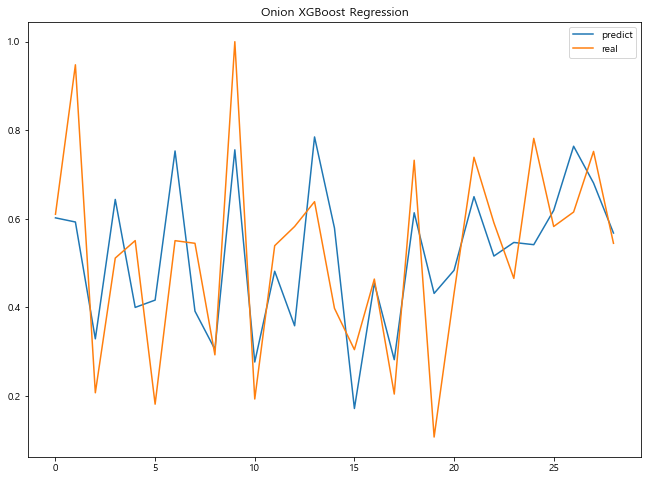

In [30]:
plt.figure(figsize=(11,8))
plt.plot(range(len(X_test)),model.predict(X_test), label='predict')
plt.plot(range(len(X_test)), y_test, label='real')
plt.title('Onion XGBoost Regression')
plt.legend()         
plt.show()         

In [31]:
xgb=XGBRegressor()

xgb_param_grid={
    'n_estimator' : list(range(1000,2000,100)),
    'learning_rate' : list(np.arange(0.026,0.03, 0.0001)),
    'max_depth' : list(range(1,4,1))
}

In [32]:
xgb_grid = GridSearchCV(xgb,
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1054 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 3054 tasks      | elapsed:   16.7s


[12:25:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   18.9s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                           0.028099999999999986,
                                           0.028199999999999985,
                                           0.028299999999999985,
                                           0.028399999999999984,
                                           0.028499999999999984,
                                      

In [33]:
print('final params:', xgb_grid.best_params_)
print('best score:', xgb_grid.best_score_)

final params: {'learning_rate': 0.029599999999999977, 'max_depth': 2, 'n_estimator': 1000}
best score: 0.37943517239002506


In [34]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [35]:
cv_result_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
1099,"{'learning_rate': 0.029599999999999977, 'max_d...",0.379435,1
1090,"{'learning_rate': 0.029599999999999977, 'max_d...",0.379435,1
1091,"{'learning_rate': 0.029599999999999977, 'max_d...",0.379435,1
1092,"{'learning_rate': 0.029599999999999977, 'max_d...",0.379435,1
1093,"{'learning_rate': 0.029599999999999977, 'max_d...",0.379435,1
...,...,...,...
64,"{'learning_rate': 0.026199999999999998, 'max_d...",0.286685,1191
63,"{'learning_rate': 0.026199999999999998, 'max_d...",0.286685,1191
62,"{'learning_rate': 0.026199999999999998, 'max_d...",0.286685,1191
60,"{'learning_rate': 0.026199999999999998, 'max_d...",0.286685,1191


In [36]:
cv_result=cv_result_df[['params','mean_test_score','rank_test_score']]
cv_result.to_csv('../data/cv_result.csv',index=False)

# XGBR

In [37]:
def xgb_reg(X_train,y_train,X_test,y_test):
  #최적의 파라미터 추출
    tic=time.time()
    xgb_param_grid={
        'n_estimator' : list(range(1000,2000,100)),
        'learning_rate' : list(np.arange(0.0260,0.031, 0.0001)),
        'max_depth' : list(range(1,4,1))}
    xgb = GridSearchCV(XGBRegressor(),
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
    xgb_result = xgb.fit(X_train,y_train)
    best_params = xgb_result.best_params_
    
    #최적의 모델
    best_xgb = XGBRegressor(learning_rate=best_params["learning_rate"], 
                           max_depth=best_params["max_depth"], 
                           n_estimators=best_params["n_estimator"],
                           verbose=1, 
                           max_iter=10000)
    #최적의 모델로 데이터 핏팅
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)
    toc=time.time()
    #점수 저장 
    global R_xgb, MAE_xgb, RMSE_xgb
    R_xgb = round(best_xgb.score(X_test,y_test),3)
    MAE_xgb = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_xgb = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
    
    
    return (best_xgb.score(X_test,y_test),
            mean_absolute_error(y_test,y_pred),
            np.sqrt(mean_squared_error(y_test,y_pred)),
            (toc-tic))
            
    '''
    #scoring = { 'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error',
                'R-squared':'r2'}
        
    # scores = cross_validate(best_xgb, X, y, cv=5, scoring=scoring, return_train_score=True)
    
    global MAE_xgb, RMSE_xgb, R2_xgb
    MAE_xgb = abs(scores['test_abs_error'].mean())
    RMSE_xgb = np.sqrt(abs(scores['test_squared_error'].mean()))
    R2_xgb = scores['test_R-squared'].mean()
    
    return (scores,
            "Training MAE: ",abs(scores['train_abs_error'].mean()), 
        "Training RMSE:", np.sqrt(abs(scores['train_squared_error'].mean())),
        "Test MAE: ", abs(scores['test_abs_error'].mean()), 
        "Test RMSE:", np.sqrt(abs(scores['test_squared_error'].mean())),
        "R-square:", scores['test_R-squared'].mean())
        
    '''   
xgb_reg(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 1530 candidates, totalling 4590 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:   18.5s


[12:25:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 4590 out of 4590 | elapsed:   20.1s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.47612884901466246,
 0.13164419768653918,
 0.15870682021685767,
 20.374176263809204)

# Linear Regression 

In [38]:
#%% Modeling1. Linear Regression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

#MSE, RMSE 
print('\nTest MAE:', mean_absolute_error(y_test, y_pred))  
print('Test MSE:',mean_squared_error(y_test, y_pred))  
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#R-squared 
print('Test R:', r2_score(y_test,y_pred))

MAE_lr =  round(mean_absolute_error(y_test, y_pred),3)
RMSE_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
R_lr = round(r2_score(y_test,y_pred),3)


Test MAE: 0.13785828251665785
Test MSE: 0.025327453906276554
Test RMSE: 0.15914601442158882
Test R: 0.4732253880476517


# SVR_Li

In [39]:
#%% Modeling2. SVR  
#SVR kernel='linear'
def svr_model_lr(X_train, y_train, X_test, y_test):
    tic=time.time()
    #best parameter extraction
    gsc = GridSearchCV(
        estimator=SVR(kernel='linear'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    #best model
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma='auto',
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    toc=time.time()
    #socres 
    global R_svr_li, MAE_svr_li, RMSE_svr_li
    R_svr_li = round(best_svr.score(X_test,y_test),3)
    MAE_svr_li = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_li = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr.score(X_test,y_test),
             'MAE:',mean_absolute_error(y_test,y_pred),
             'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)),
             'Time:',toc-tic)

#Training 
svr_model_lr(X_train,y_train,X_test,y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.4303201042363018,
 'MAE:',
 0.14077149928415325,
 'RMSE:',
 0.16550030388554005,
 'Time:',
 4.124286651611328)

# SVR_rbf

In [40]:
#SVR kernel='rbf'
def svr_model_rbf(X_train, y_train, X_test, y_test):
    tic=time.time()
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    best_svr_rbf = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr_rbf.fit(X_train, y_train)
    y_pred = best_svr_rbf.predict(X_test)
    toc=time.time()
    #socres 
    global R_svr_rbf, MAE_svr_rbf, RMSE_svr_rbf
    R_svr_rbf = round(best_svr_rbf.score(X_test,y_test),3)
    MAE_svr_rbf = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_rbf = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr_rbf.score(X_test,y_test),
             'MAE:',mean_absolute_error(y_test,y_pred),
             'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)),
             'Time:',toc-tic)
    
#Training 
svr_model_rbf(X_train, y_train, X_test, y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.4740445945923846,
 'MAE:',
 0.1374226249416574,
 'RMSE:',
 0.1590222193674882,
 'Time:',
 3.5170323848724365)

In [41]:
print('=====Linear Regression====')
print('MAE:', MAE_lr)
print('RMSE:', RMSE_lr)
print('R-squared', R_lr)

print('====SVR kernel linear====')
print('MAE:', MAE_svr_li)
print('RMSE:', RMSE_svr_li)
print('R-squared', R_svr_li)

print('====SVR kernel rbf====')
print('MAE:', MAE_svr_rbf)
print('RMSE:', RMSE_svr_rbf)
print('R-squared', R_svr_rbf)

print('====XgBoost====')
print('MAE:', MAE_xgb)
print('RMSE:', RMSE_xgb)
print('R-squared', R_xgb)

=====Linear Regression====
MAE: 0.138
RMSE: 0.159
R-squared 0.473
====SVR kernel linear====
MAE: 0.141
RMSE: 0.166
R-squared 0.43
====SVR kernel rbf====
MAE: 0.137
RMSE: 0.159
R-squared 0.474
====XgBoost====
MAE: 0.132
RMSE: 0.159
R-squared 0.476
